In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Reading The Dataset

dataset = pd.read_excel("House Price Prediction.xlsx")

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Exploring The DataSet**

Performing Exploratory Data Analysis

In [43]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [45]:
# Now we will drop the id and date 

dataset = dataset.drop(columns=["date","id"])

In [46]:
# Then we wil check if there are any null values
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now as per the analysis above our data is clean and  
 
no more cleaning is required as there are no null Values

**Now we will plot co-relation matrix heatmap and see the dependent and independent values**

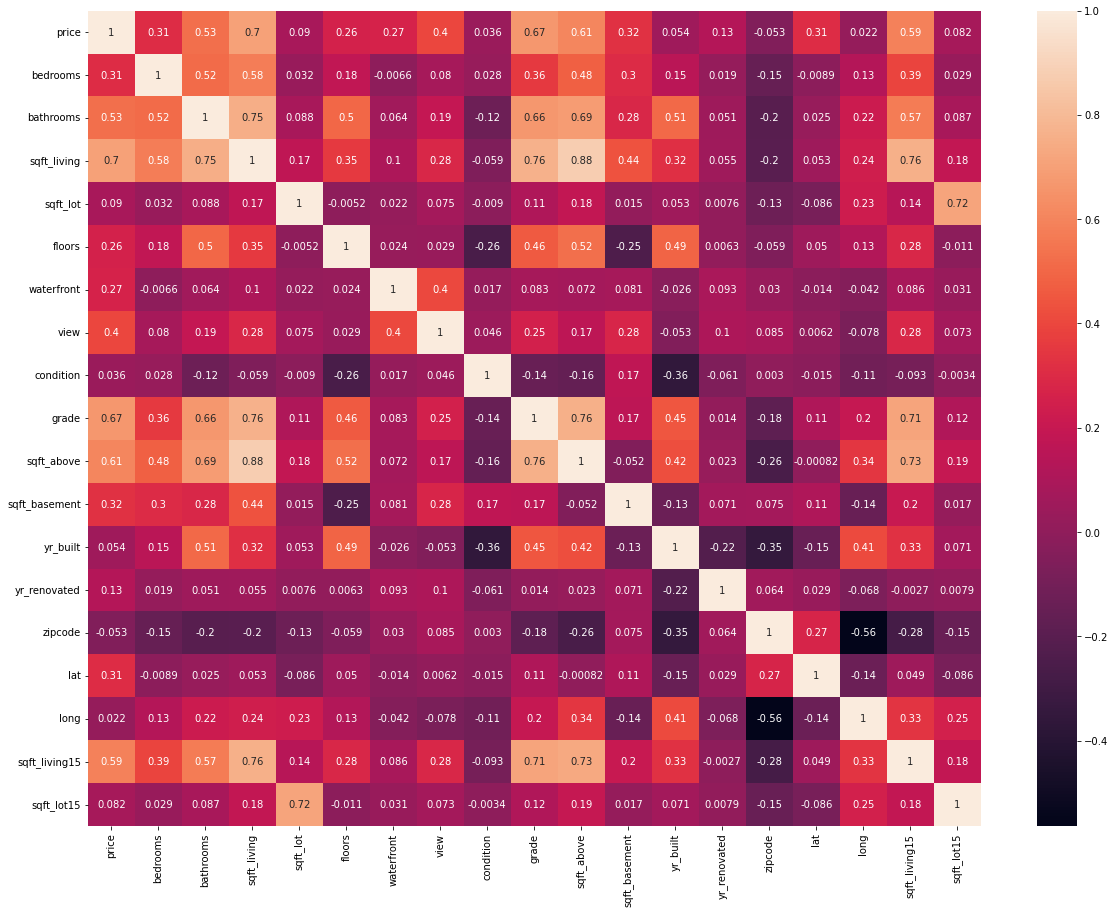

In [47]:
corr_matrix = dataset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Now on the base of above matrix we will get the features importance or we can say that we are going to perform **Feature Engineering**

In [48]:
# Here we will keep the relevant columns that are making impact on Price 

cor_target = abs(corr_matrix["price"])
relevant_features = cor_target[cor_target>0]
relevant_features

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode          0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [49]:
# Here we will keep the irrelevant columns that are making a high impact on Price 
to_drop = cor_target[cor_target<0.1]
to_drop_frame = to_drop.to_frame()
to_drop_frame

,price
sqft_lot,0.089661
condition,0.036362
yr_built,0.054012
zipcode,0.053203
long,0.021626
sqft_lot15,0.082447


When we have completed the **Feature Engineering** and got the Relevant Features we will select only the *relevant features*

and drop the *irreleavnt features* from the dataset and then use that dataet for training Our **Machine Learning Model**

In [50]:
# Firslty let us convert the relevant features into List 

relevant_features = list(dict(relevant_features).keys())
# Now we will drop the first one as it is the Price Column 
relevant_features.pop(0)

relevant_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [51]:
# Now we will select the X and y Variables 
X = dataset[relevant_features]
y = dataset.price

# **Implementing Regression Models for Predicting House Prices**

Now as Our Dataset is ready. Now, we will create **Two Machine Learning Models** 

**1. Decision Tree Model**

**2. Linear Regression Model** 

Then we will Evaluate and Compare the performance of Both Models and then Choose one for using it to Predict in Future the House Prices

In [52]:

# Let us Import all the required Libraries for Machine Learning Models and Evaluation of Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Now we split our data into training and testing sets using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [53]:
dec_reg = DecisionTreeRegressor()

dec_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [54]:
# let us predict now 
y_pred = dec_reg.predict(X_test)

Now evaluating our Decsion Tree Model

MAPE_Score: 18.13


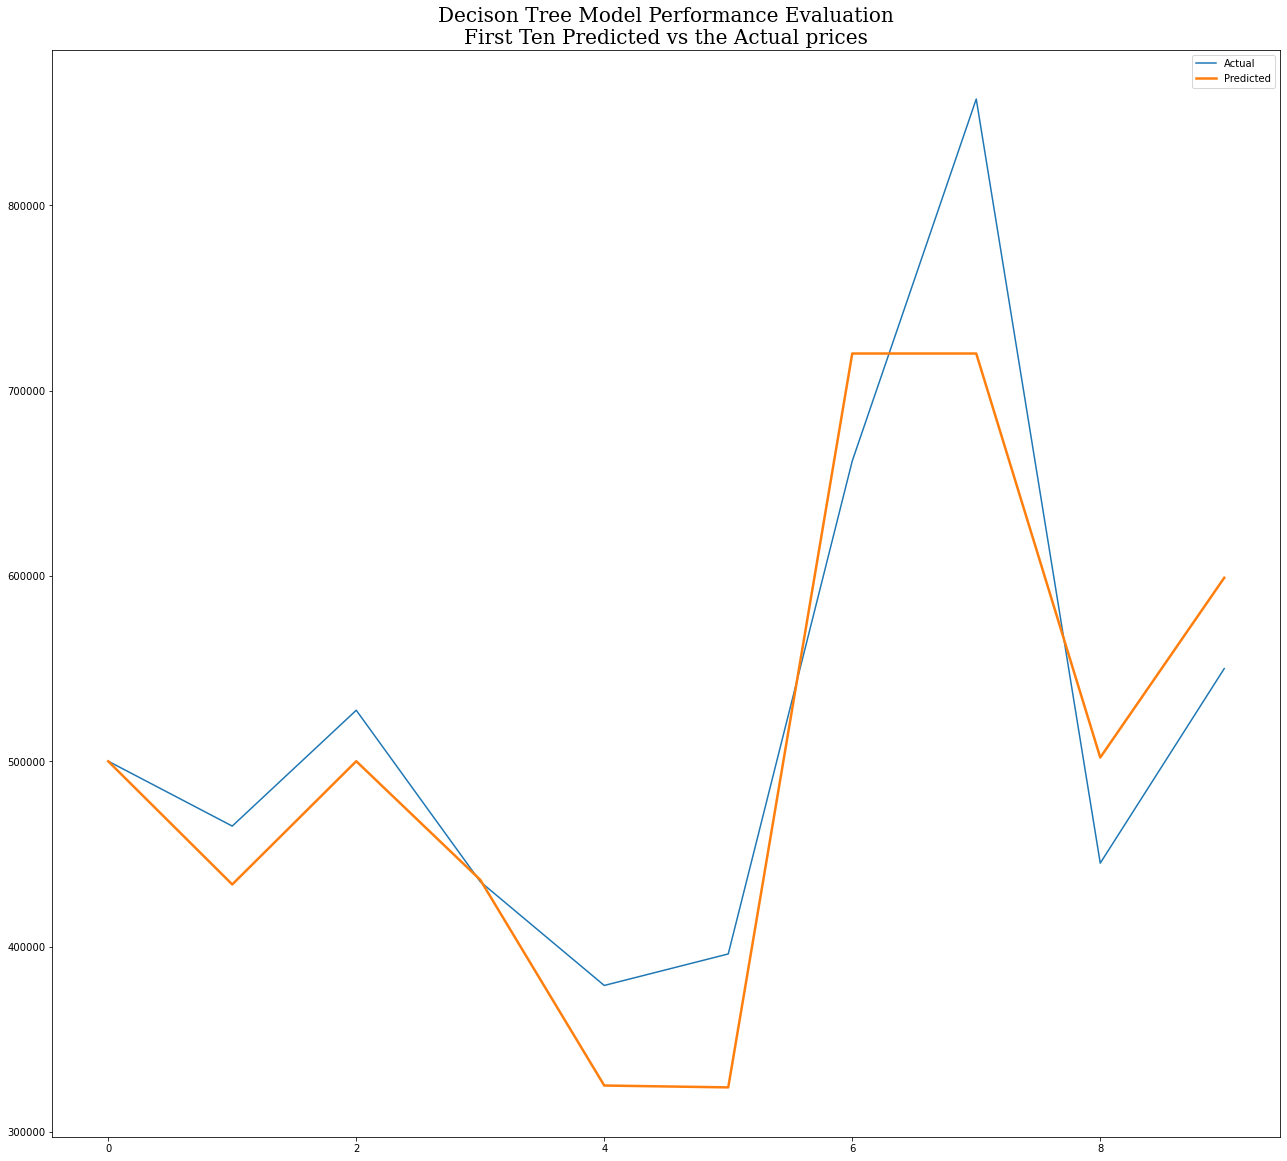

In [62]:
decisionTree_mape_Score = mean_absolute_percentage_error(y_test, y_pred)*100

print("MAPE_Score: %.2f" % decisionTree_mape_Score)

# Now let us visualize the first ten predictions and and the True Results and see how nearly our Model is correct

plt.figure(figsize=(22,20))
plt.title("Decison Tree Model Performance Evaluation\nFirst Ten Predicted vs the Actual prices",fontdict={'family':'serif','color':'Black','size':20})
plt.plot(list(y_test)[:10],label="Actual")
plt.plot(list(y_pred)[:10],label="Predicted",linewidth = '2.5')
plt.legend()

**Implementing the Second Model Linear Regression using Polynomial Features**

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


Polynomial_model = make_pipeline(PolynomialFeatures(2),LinearRegression())

Polynomial_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [57]:
# Lets predcit using our Linear regression model

pred_lin_mod = Polynomial_model.predict(X_test)

Evaluating our Linear Regression model

Mape Score of Linear Regression Model: 20.36


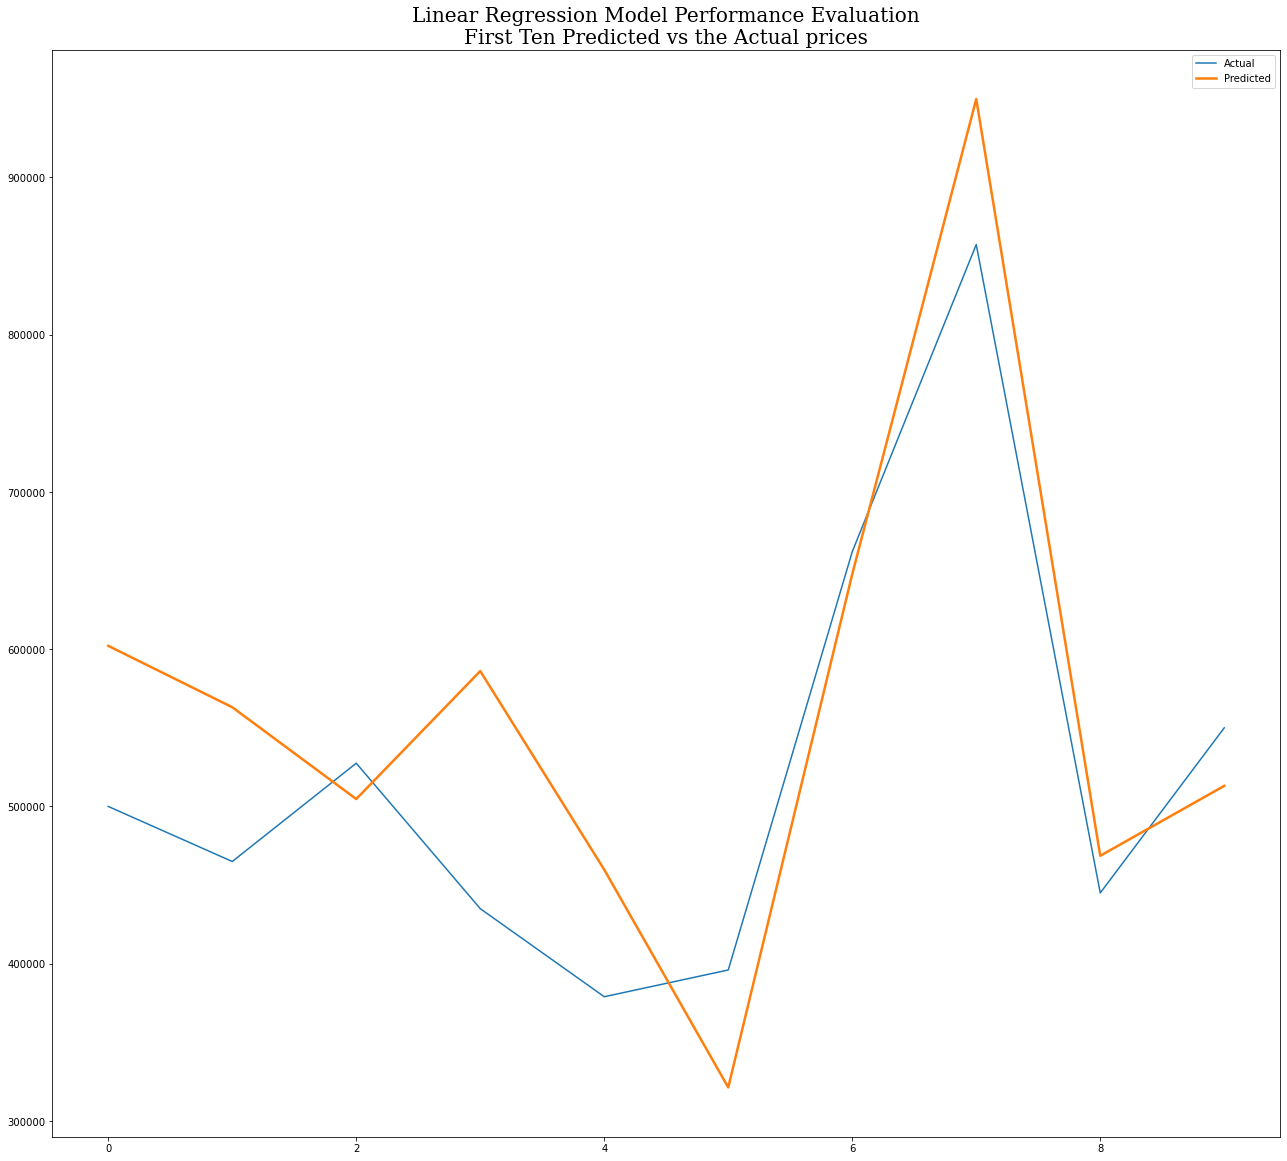

In [63]:
# Let us Now Evaluate our Linear Regression Model

polynomial_reg_mape_score = mean_absolute_percentage_error(y_test,pred_lin_mod)*100
print("Mape Score of Linear Regression Model: %.2f" % polynomial_reg_mape_score)

# Now let us Again compare the first ten Predicted vs the first ten Actual Prices

plt.figure(figsize=(22,20))
plt.title("Linear Regression Model Performance Evaluation\nFirst Ten Predicted vs the Actual prices",
          fontdict={'family':'serif','color':'Black','size':20})
plt.plot(list(y_test)[:10],label="Actual")
plt.plot(list(pred_lin_mod)[:10],label="Predicted",linewidth = '2.5')
plt.legend()

**Let us Compare the Perfromance of Both Models**

<AxesSubplot:>

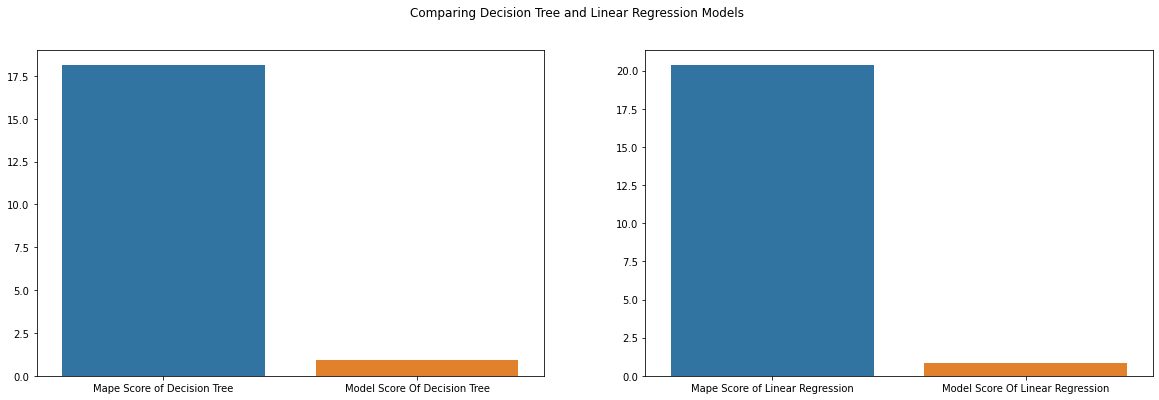

In [59]:
plt.figure(figsize=(20,6))
plt.suptitle("Comparing Decision Tree and Linear Regression Models")
plt.subplot(1,2,1)
sns.barplot(x = ["Mape Score of Decision Tree","Model Score Of Decision Tree"], y=[decisionTree_mape_Score,dec_reg.score(X,y)])
plt.subplot(1,2,2)
sns.barplot(x = ["Mape Score of Linear Regression","Model Score Of Linear Regression"], y=[polynomial_reg_mape_score,Polynomial_model.score(X,y)])


In [60]:
print("-------------Mape Scores of Both Models---------------\n")
print("MAPE Score of Decision Tree : ",decisionTree_mape_Score)
print("MAPE Score of Linear Regression : ",polynomial_reg_mape_score)

-------------Mape Scores of Both Models---------------

MAPE Score of Decision Tree :  18.12911701840181
MAPE Score of Linear Regression :  20.357411503951344


**So, Comparing both Results we can say that, Decsion Tree Model is Working Best and can be used for Future Predictions**